# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [ ]:
# only library allowed do not modify
import pandas as pd
from src.sql import execute_query

In [ ]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

In [ ]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [1]:
import pandas as pd
from src.sql import execute_query
# uso la función de ejecutar el query de apoyo tal como se sugiere en el ejemplo
# P.d. lo uso asi para solo correr esta celda
execute_query("""
        SELECT Location, COUNT(TweetAt) AS TweetAtConteo
        FROM train_table
        GROUP BY Location -- Agrupo por locación 
        ORDER BY TweetAtConteo DESC -- ordeno el conteo de Tweets de mayor a menor
        LIMIT 10 -- limito a 10 registros el resultado
""")

,Location,TweetAtConteo
0,None,8590
1,London,540
2,United States,528
3,"London, England",520
4,"New York, NY",395
5,"Washington, DC",373
6,United Kingdom,337
7,"Los Angeles, CA",281
8,India,268
9,UK,232


In [ ]:
#result_1 = execute_query(query_1)

In [ ]:
#result_1

## Question 2: Intermediate SQL


In [9]:
import pandas as pd
from src.sql import execute_query
# uso la función de ejecutar el query de apoyo tal como se sugiere en el ejemplo
# P.d. lo uso asi para solo correr esta celda por comodidad
execute_query("""
        SELECT 
            UserName,
            COUNT(CASE WHEN Sentiment = 'Positive' THEN 1 END) AS pos_count,
            COUNT(CASE WHEN Sentiment = 'Negative' THEN 1 END) AS neg_count,
            COUNT(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 END) AS extremely_pos_count,
            COUNT(CASE WHEN Sentiment = 'Extremely Negative' THEN 1 END) AS extremely_neg_count,
            COUNT(CASE WHEN Sentiment = 'Neutral' THEN 1 END) AS Neutral_count
        FROM train_table
        GROUP BY UserName
        Limit 10 -- Por la muestra limito a 10 el resultado
""")
# write query inside docstring
#query_2 = """

#"""

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count,Neutral_count
0,0,1,0,0,0,2
1,1,2,0,2,0,0
2,2,0,1,0,0,1
3,3,1,0,0,1,0
4,4,1,0,1,0,0
5,5,1,2,1,0,0
6,6,0,1,0,0,0
7,7,1,1,0,0,2
8,8,0,1,1,0,0
9,9,0,1,1,0,0


In [ ]:
#result_2 = execute_query(query_2)

In [ ]:
#result_2

## Question 3: Medium SQL

In [27]:
# write query inside docstring
query_3 = """
        SELECT 
            TweetAt,
            CAST(
                (COUNT(CASE WHEN Sentiment IN ('Positive', 'Extremely Positive') THEN 1 END)) AS FLOAT
            ) / 
            NULLIF( -- NULLIF para evitar divisiones en 0
                (
                    COUNT(CASE WHEN Sentiment IN ('Positive', 'Extremely Positive') THEN 1 END) +
                    COUNT(CASE WHEN Sentiment IN ('Negative', 'Extremely Negative') THEN 1 END)
                ), 0
            ) AS pos_rate
        FROM train_table
        GROUP BY TweetAt
        ORDER BY TweetAt
"""

In [28]:
result_3 = execute_query(query_3)

In [29]:
result_3

,TweetAt,pos_rate
0,01-04-2020,0.512871
1,02-04-2020,0.520584
2,03-04-2020,0.525915
3,04-04-2020,0.566719
4,05-04-2020,0.573661
5,06-04-2020,0.544139
6,07-04-2020,0.550034
7,08-04-2020,0.589050
8,09-04-2020,0.605396
9,10-04-2020,0.592689


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [30]:
def plot(df: pd.DataFrame):
    # Copia del DataFrame original
    temp_df = df.copy()
    
    # Formateo de fecha
    temp_df['TweetAt'] = pd.to_datetime(temp_df['TweetAt']) 
    
    # Indexar TweetAt
    temp_df.set_index('TweetAt', inplace=True)
    
    # Cálculo de la media de pos_rate muestreada por día
    Media = temp_df.resample('D')['pos_rate'].mean()
    
    # Graficar la serie temporal
    Media.plot(title="Tasa Positiva por Día", ylabel="pos_rate", xlabel="Fecha")

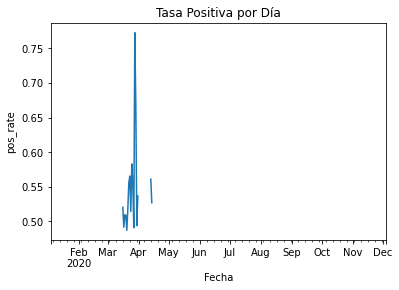

In [31]:
plot(result_3)

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5